In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
nypd_data = pd.read_csv("project_data.csv")

In [35]:
nypd_data.head(5)

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,1/1/2023,12/31/2022,23:24:39,67,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,1/1/2023 1:08,1/1/2023 1:09,NaN,1/1/2023 1:57,40.649730,-73.936475
1,91250180,1/1/2023,12/31/2022,23:24:47,75,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,1/1/2023 0:38,1/1/2023 0:38,1/1/2023 0:44,1/1/2023 1:45,40.662817,-73.881221
2,91250681,1/1/2023,12/31/2022,23:55:56,114,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,1/1/2023 0:01,1/1/2023 0:06,NaN,1/1/2023 0:06,40.762587,-73.912199
3,91250683,1/1/2023,12/31/2022,23:55:59,66,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,1/1/2023 0:01,1/1/2023 0:37,1/1/2023 1:09,1/1/2023 1:21,40.610729,-73.967644
4,91250700,1/1/2023,12/31/2022,23:57:08,115,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,1/1/2023 0:01,1/1/2023 0:14,1/1/2023 0:21,1/1/2023 1:24,40.748119,-73.891679


In [36]:
nypd_data['CREATE_DATE'] = pd.to_datetime(nypd_data['CREATE_DATE'])

In [37]:
weather = pd.read_csv("NY weather.csv")

In [38]:
weather['datetime'] = pd.to_datetime(weather['datetime'])

In [39]:
nypd_data = pd.merge(nypd_data, weather, left_on='CREATE_DATE', right_on='datetime', how='inner')

In [40]:
nypd_data['RADIO_CODE'] = nypd_data['RADIO_CODE'].astype(str)  # Ensure the column is treated as strings

# Extract unique radio codes and their counts
radio_code_counts = nypd_data['RADIO_CODE'].value_counts()

# Print the unique radio codes and their counts
print("Unique Radio Codes and Counts:")
for code in radio_code_counts.items():
    print(f"{code}")

Unique Radio Codes and Counts:
('75D', 140534)
('75S', 104177)
('75T', 73107)
('68Q1', 71703)
('75M', 55940)
('54E1', 34193)
('75F', 31409)
('10H1', 30598)
('10Y3', 26360)
('10V2', 24994)
('11C4', 21433)
('75C', 18874)
('52D1', 18597)
('75I', 17305)
('52D6', 16923)
('75Z', 16150)
('53S', 15522)
('75P', 14834)
('50P1', 12575)
('39H1', 12305)
('75O', 10348)
('54S1', 10292)
('10P2', 9962)
('54U1', 9466)
('22Q1', 9100)
('32Q1', 8208)
('68Q2', 8027)
('54E2', 7962)
('10H2', 7177)
('56S', 6628)
('22Q2', 6088)
('52D2', 5951)
('39H2', 5448)
('11R4', 5113)
('54U2', 4551)
('10P9', 4433)
('50P9', 4382)
('54C1', 4325)
('22V2', 4209)
('50G1', 4044)
('29H1', 3760)
('34Q6', 3696)
('50P2', 3592)
('54S9', 3533)
('34Q1', 3499)
('39T1', 3425)
('44H1', 3156)
('29C', 3145)
('53I', 3119)
('75H', 3059)
('59R4', 3017)
('68Q9', 2843)
('53D', 2730)
('75B', 2676)
('53H', 2656)
('34Q2', 2443)
('56S9', 2414)
('67S8', 2396)
('53S8', 2356)
('10P1', 2304)
('54S2', 2240)
('54R1', 2088)
('10Y8', 2052)
('31R', 2045)
('11

In [41]:
import pandas as pd

# List of radio codes to filter
radio_codes_to_filter = ['75D', '75S', '75T', '75M', '75F', '10Y3', '10V2']

# Filter nypd_data based on the radio codes
filtered_df = nypd_data[nypd_data['RADIO_CODE'].isin(radio_codes_to_filter)]

# Display the filtered DataFrame
print(filtered_df)



         CAD_EVNT_ID CREATE_DATE INCIDENT_DATE INCIDENT_TIME  NYPD_PCT_CD  \
7           91250747  2023-01-01      1/1/2023       0:00:15           14   
8           91250747  2023-01-01      1/1/2023       0:00:15           14   
9           91250748  2023-01-01      1/1/2023       0:00:40           41   
11          91250750  2023-01-01      1/1/2023       0:00:58           94   
16          91250758  2023-01-01      1/1/2023       0:01:34           24   
...              ...         ...           ...           ...          ...   
1048565     92500496  2023-02-20     2/20/2023       0:32:31           47   
1048567     92500498  2023-02-20     2/20/2023       0:32:32           19   
1048569     92500500  2023-02-20     2/20/2023       0:32:42          112   
1048570     92500502  2023-02-20     2/20/2023       0:32:54           40   
1048572     92500504  2023-02-20     2/20/2023       0:33:08           40   

           BORO_NM             PATRL_BORO_NM  GEO_CD_X  GEO_CD_Y RADIO_CODE

In [42]:
filtered_df.drop(columns=['ADD_TS', 'DISP_TS', 'ARRIVD_TS', 'CLOSNG_TS', 'CIP_JOBS', 'GEO_CD_X', 'GEO_CD_Y', 'CAD_EVNT_ID'], inplace=True)

C:\Users\heetg\AppData\Local\Temp\ipykernel_18036\2481759798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['ADD_TS', 'DISP_TS', 'ARRIVD_TS', 'CLOSNG_TS', 'CIP_JOBS', 'GEO_CD_X', 'GEO_CD_Y', 'CAD_EVNT_ID'], inplace=True)


In [43]:
filtered_df.shape

(456521, 15)

In [44]:
filtered_df.head

<bound method NDFrame.head of         CREATE_DATE INCIDENT_DATE INCIDENT_TIME  NYPD_PCT_CD    BORO_NM  \
7        2023-01-01      1/1/2023       0:00:15           14  MANHATTAN   
8        2023-01-01      1/1/2023       0:00:15           14  MANHATTAN   
9        2023-01-01      1/1/2023       0:00:40           41      BRONX   
11       2023-01-01      1/1/2023       0:00:58           94   BROOKLYN   
16       2023-01-01      1/1/2023       0:01:34           24  MANHATTAN   
...             ...           ...           ...          ...        ...   
1048565  2023-02-20     2/20/2023       0:32:31           47      BRONX   
1048567  2023-02-20     2/20/2023       0:32:32           19  MANHATTAN   
1048569  2023-02-20     2/20/2023       0:32:42          112     QUEENS   
1048570  2023-02-20     2/20/2023       0:32:54           40      BRONX   
1048572  2023-02-20     2/20/2023       0:33:08           40      BRONX   

                    PATRL_BORO_NM RADIO_CODE  \
7           PATROL BO

In [45]:
filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATE'] + ' ' + filtered_df['INCIDENT_TIME'])

C:\Users\heetg\AppData\Local\Temp\ipykernel_18036\3725373530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATE'] + ' ' + filtered_df['INCIDENT_TIME'])


In [46]:
filtered_df.head

<bound method NDFrame.head of         CREATE_DATE INCIDENT_DATE INCIDENT_TIME  NYPD_PCT_CD    BORO_NM  \
7        2023-01-01      1/1/2023       0:00:15           14  MANHATTAN   
8        2023-01-01      1/1/2023       0:00:15           14  MANHATTAN   
9        2023-01-01      1/1/2023       0:00:40           41      BRONX   
11       2023-01-01      1/1/2023       0:00:58           94   BROOKLYN   
16       2023-01-01      1/1/2023       0:01:34           24  MANHATTAN   
...             ...           ...           ...          ...        ...   
1048565  2023-02-20     2/20/2023       0:32:31           47      BRONX   
1048567  2023-02-20     2/20/2023       0:32:32           19  MANHATTAN   
1048569  2023-02-20     2/20/2023       0:32:42          112     QUEENS   
1048570  2023-02-20     2/20/2023       0:32:54           40      BRONX   
1048572  2023-02-20     2/20/2023       0:33:08           40      BRONX   

                    PATRL_BORO_NM RADIO_CODE  \
7           PATROL BO

In [47]:
filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATETIME'], format = '%Y/%m/%d %H:%M:%S')

C:\Users\heetg\AppData\Local\Temp\ipykernel_18036\696718257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATETIME'], format = '%Y/%m/%d %H:%M:%S')


In [48]:
filtered_df.dtypes

CREATE_DATE          datetime64[ns]
INCIDENT_DATE                object
INCIDENT_TIME                object
NYPD_PCT_CD                   int64
BORO_NM                      object
PATRL_BORO_NM                object
RADIO_CODE                   object
TYP_DESC                     object
Latitude                    float64
Longitude                   float64
datetime             datetime64[ns]
temp                        float64
dew                         float64
humidity                    float64
windspeed                   float64
INCIDENT_DATETIME    datetime64[ns]
dtype: object

In [49]:
filtered_df['INCIDENT_DATETIME']

7         2023-01-01 00:00:15
8         2023-01-01 00:00:15
9         2023-01-01 00:00:40
11        2023-01-01 00:00:58
16        2023-01-01 00:01:34
                  ...        
1048565   2023-02-20 00:32:31
1048567   2023-02-20 00:32:32
1048569   2023-02-20 00:32:42
1048570   2023-02-20 00:32:54
1048572   2023-02-20 00:33:08
Name: INCIDENT_DATETIME, Length: 456521, dtype: datetime64[ns]

In [50]:
import pandas as pd

# Assuming filtered_df is your DataFrame
column_1 = filtered_df['INCIDENT_DATETIME']  # Select the 'INCIDENT_DATETIME' column

# Create a new DataFrame with date and time components
db = pd.DataFrame({
    "year": column_1.dt.year,
    "month": column_1.dt.month,
    "day": column_1.dt.day,
    "hour": column_1.dt.hour,
    "dayofyear": column_1.dt.dayofyear,
    "week": column_1.dt.isocalendar().week,  # Corrected to use isocalendar().week
    "weekofyear": column_1.dt.isocalendar().week,
    "dayofweek": column_1.dt.dayofweek,
    "weekday": column_1.dt.weekday,
    "quarter": column_1.dt.quarter,
})


In [51]:
filtered_df.columns

Index(['CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME', 'NYPD_PCT_CD',
       'BORO_NM', 'PATRL_BORO_NM', 'RADIO_CODE', 'TYP_DESC', 'Latitude',
       'Longitude', 'datetime', 'temp', 'dew', 'humidity', 'windspeed',
       'INCIDENT_DATETIME'],
      dtype='object')

In [52]:
data1=pd.concat([db,filtered_df],axis=1)

In [53]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456521 entries, 7 to 1048572
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   year               456521 non-null  int32         
 1   month              456521 non-null  int32         
 2   day                456521 non-null  int32         
 3   hour               456521 non-null  int32         
 4   dayofyear          456521 non-null  int32         
 5   week               456521 non-null  UInt32        
 6   weekofyear         456521 non-null  UInt32        
 7   dayofweek          456521 non-null  int32         
 8   weekday            456521 non-null  int32         
 9   quarter            456521 non-null  int32         
 10  CREATE_DATE        456521 non-null  datetime64[ns]
 11  INCIDENT_DATE      456521 non-null  object        
 12  INCIDENT_TIME      456521 non-null  object        
 13  NYPD_PCT_CD        456521 non-null  int64       

In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame with the 'RADIO_CODE' column
# Perform one-hot encoding
encoded_df = pd.get_dummies(data1, columns=['RADIO_CODE'], drop_first=False)


In [55]:
encoded_df.head

<bound method NDFrame.head of          year  month  day  hour  dayofyear  week  weekofyear  dayofweek  \
7        2023      1    1     0          1    52          52          6   
8        2023      1    1     0          1    52          52          6   
9        2023      1    1     0          1    52          52          6   
11       2023      1    1     0          1    52          52          6   
16       2023      1    1     0          1    52          52          6   
...       ...    ...  ...   ...        ...   ...         ...        ...   
1048565  2023      2   20     0         51     8           8          0   
1048567  2023      2   20     0         51     8           8          0   
1048569  2023      2   20     0         51     8           8          0   
1048570  2023      2   20     0         51     8           8          0   
1048572  2023      2   20     0         51     8           8          0   

         weekday  quarter  ... humidity windspeed   INCIDENT_DATETIME

In [56]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456521 entries, 7 to 1048572
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   year               456521 non-null  int32         
 1   month              456521 non-null  int32         
 2   day                456521 non-null  int32         
 3   hour               456521 non-null  int32         
 4   dayofyear          456521 non-null  int32         
 5   week               456521 non-null  UInt32        
 6   weekofyear         456521 non-null  UInt32        
 7   dayofweek          456521 non-null  int32         
 8   weekday            456521 non-null  int32         
 9   quarter            456521 non-null  int32         
 10  CREATE_DATE        456521 non-null  datetime64[ns]
 11  INCIDENT_DATE      456521 non-null  object        
 12  INCIDENT_TIME      456521 non-null  object        
 13  NYPD_PCT_CD        456521 non-null  int64       

In [57]:
boolean_columns = [
    'RADIO_CODE_10V2', 'RADIO_CODE_10Y3',
    'RADIO_CODE_75D',
    'RADIO_CODE_75F', 'RADIO_CODE_75M', 'RADIO_CODE_75S',
    'RADIO_CODE_75T'
]

In [58]:
encoded_df[boolean_columns] = encoded_df[boolean_columns].astype(int)

In [59]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456521 entries, 7 to 1048572
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   year               456521 non-null  int32         
 1   month              456521 non-null  int32         
 2   day                456521 non-null  int32         
 3   hour               456521 non-null  int32         
 4   dayofyear          456521 non-null  int32         
 5   week               456521 non-null  UInt32        
 6   weekofyear         456521 non-null  UInt32        
 7   dayofweek          456521 non-null  int32         
 8   weekday            456521 non-null  int32         
 9   quarter            456521 non-null  int32         
 10  CREATE_DATE        456521 non-null  datetime64[ns]
 11  INCIDENT_DATE      456521 non-null  object        
 12  INCIDENT_TIME      456521 non-null  object        
 13  NYPD_PCT_CD        456521 non-null  int64       

In [60]:
df1 = pd.DataFrame(data=encoded_df, columns=['RADIO_CODE_10V2', 'RADIO_CODE_10Y3',
    'RADIO_CODE_75D',
    'RADIO_CODE_75F', 'RADIO_CODE_75M', 'RADIO_CODE_75S',
    'RADIO_CODE_75T'])

<Axes: ylabel='Density'>

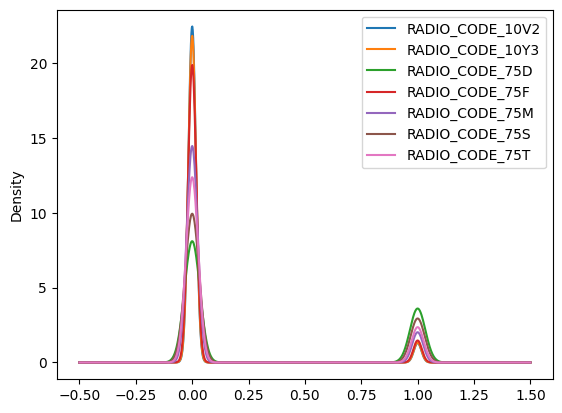

In [61]:

df1.plot.kde()

In [62]:
y=encoded_df.iloc[:,[25,26,27,28,29,30,31]].values

In [63]:
X=encoded_df.iloc[:,[1,2,3,7,8,17,18,20]].values

In [64]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456521 entries, 7 to 1048572
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   year               456521 non-null  int32         
 1   month              456521 non-null  int32         
 2   day                456521 non-null  int32         
 3   hour               456521 non-null  int32         
 4   dayofyear          456521 non-null  int32         
 5   week               456521 non-null  UInt32        
 6   weekofyear         456521 non-null  UInt32        
 7   dayofweek          456521 non-null  int32         
 8   weekday            456521 non-null  int32         
 9   quarter            456521 non-null  int32         
 10  CREATE_DATE        456521 non-null  datetime64[ns]
 11  INCIDENT_DATE      456521 non-null  object        
 12  INCIDENT_TIME      456521 non-null  object        
 13  NYPD_PCT_CD        456521 non-null  int64       

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

In [70]:
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.22659219 0.2287742  0.23776614 0.22725182 0.23819329]
Mean CV score: 0.23171552923816918


In [71]:
knn.score(X_train,y_train)

0.39451447910277754

In [72]:
knn.score(X_test,y_test)

0.24509063030502162

In [179]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [20, 30, 40],
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 40, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [73]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=40, metric='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.37


In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [75]:

from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(dtree, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.58193691 0.57793355 0.58158893 0.5778514  0.5824925 ]
Mean cross-validation score: 0.5803606589627625


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train contains the training features and y_train contains the corresponding labels
# You already have X_test and y_test for testing the final model

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # You can adjust the range of values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters
best_dtree = DecisionTreeClassifier(**best_params, random_state=42)
best_dtree.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set
accuracy = best_dtree.score(X_test, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


C:\Users\heetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\heetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.48


In [77]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
y_pred=dtree.predict(X_test)

In [79]:
dtree.score(X_test,y_test)

0.586309621597941

In [80]:
dtree.score(X_train,y_train)

0.8919954218873215

In [117]:
y_pred

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [81]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)

In [82]:
treefeatures

array([0.01924747, 0.09277945, 0.07867324, 0.03529432, 0.03552746,
       0.33103582, 0.32297597, 0.08446627])

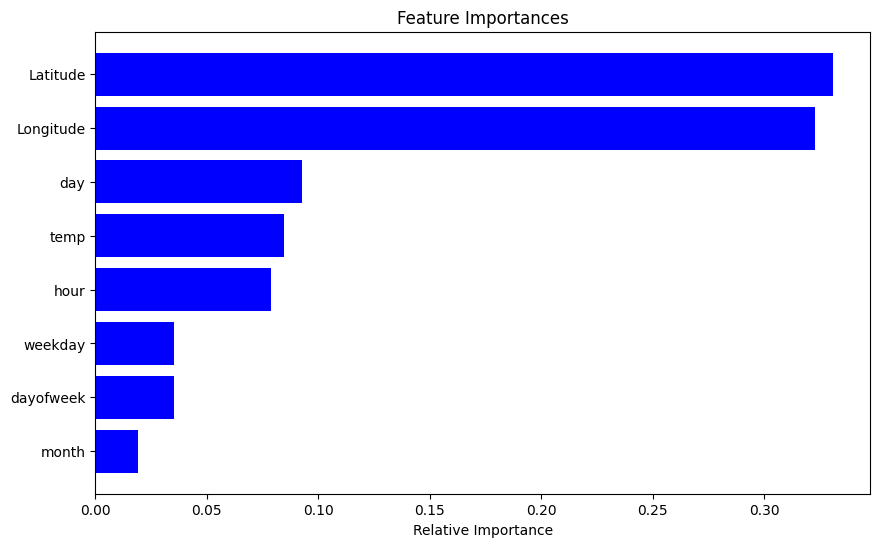

In [83]:
features = encoded_df.iloc[:, [1, 2, 3, 7, 8, 17, 18,20]]
feature_names = features.columns.tolist()  # Get the column names as a list

plt.figure(figsize=(10, 6))  # Set the figure size as needed
plt.title('Feature Importances')
plt.barh(range(len(treefeatures)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(treefeatures)), [feature_names[i] for i in indices])  # Use list comprehension to get feature names
plt.xlabel('Relative Importance')
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
y_pred=rfc.predict(X_test)

In [86]:
rfc.score(X_test,y_test)

0.3969552598433821

In [87]:
rfc.score(X_train,y_train)

0.9141877683343556